In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('max_rows', 20)

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 3)
plt.rcParams['font.family'] = 'sans-serif'

In [3]:
AQI_FILEPATH = os.path.join(os.curdir, 'data', 'aqi.csv')

df = pd.read_csv(filepath_or_buffer=AQI_FILEPATH, parse_dates=['datetime'], index_col='datetime', na_values='NR')
df_bak = df.copy()

# 保留降雨量為 NR 值的資料
df_withnr = pd.read_csv(filepath_or_buffer=AQI_FILEPATH, parse_dates=['datetime'], index_col='datetime')
df_withnr_bak = df_withnr.copy()

# 保留還未將 datetime 設為 index 的資料
df_noindex = pd.read_csv(filepath_or_buffer=AQI_FILEPATH)
df_noindex_bak = df_noindex.copy()

# 讀取未處理過的原始資料
AQI_ORIG_FILEPATH = os.path.join(os.curdir, 'data', 'aqi_original.csv')

df_orig = pd.read_csv(AQI_ORIG_FILEPATH)
df_orig_bak = df_orig.copy()

# 讀取還未使用 pivot_table() 處理過的資料
AQI_NOPIVOT_FILEPATH = os.path.join(os.curdir, 'data', 'aqi_nopivot.csv')

df_nopivot = pd.read_csv(AQI_NOPIVOT_FILEPATH, na_values=['NR'])
df_nopivot.replace(r'[-]?\D*[.]?\D*[#*x]+', np.nan, regex=True, inplace=True)
df_nopivot.loc[:, 'value'] = df_nopivot.loc[:, 'value'].astype(np.float64)
df_nopivot_bak = df_orig.copy()

In [4]:
df.head()

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
datetime,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,20.0,2.0,0.20,0.04,1.7,7.5,9.2,25.0,67.0,18.0,NaN,88.0,1.5,2.0,33.0,37.0,1.4,0.1
2017-01-01 01:00:00,20.0,2.2,0.19,0.05,1.9,7.9,9.8,18.0,52.0,14.0,NaN,88.0,2.1,2.2,76.0,143.0,0.5,0.6
2017-01-01 02:00:00,19.0,2.2,0.24,0.08,2.0,9.3,11.0,13.0,59.0,17.0,NaN,89.0,2.0,2.3,140.0,142.0,0.5,0.6
2017-01-01 03:00:00,19.0,2.4,0.24,0.11,1.4,9.5,11.0,8.5,53.0,24.0,NaN,90.0,1.8,2.5,107.0,51.0,0.5,0.4
2017-01-01 04:00:00,18.0,3.4,0.23,0.12,6.8,11.0,17.0,1.8,37.0,25.0,NaN,90.0,1.7,3.6,96.0,106.0,1.0,0.5


# 第 3 章：製作圖表

## `plot()`：將資料轉成圖表

對 DataFrame 或是 Series 調用 `plot()` method 將可以把這些資料物件轉換為圖表。

預設支援相當多圖表的種類，這裡我們只挑選幾個常用的出來展示，如果需要查看所有圖表的類型以及用法，請參閱[官方文件](https://pandas.pydata.org/pandas-docs/stable/visualization.html#other-plots)。

調用的方法相當多元，以箱形圖 (Box plot) 為例子

* 使用 `.plot()` function 並指定 `kind` parameter：`pandas.DataFrame.plot(kind='box')`
* 使用 `.plot` attribute，再呼叫 `.box()` function：`pandas.DataFrame.plot.box()`
* 箱形圖較特殊，可以直接調用 DataFrame 的 `.boxplot()` method：`pandas.DataFrame.boxplot()`

這裡我們以調用 `.plot()` function 的方法為主。

* 參考文件：
    * [pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)
    * [pandas.Series.plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html)
    * [10 Minutes to pandas | Plotting](https://pandas.pydata.org/pandas-docs/stable/10min.html#plotting)
    * [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

> 備註：
>
> 此次的教學環境是以 Jupyter Notebook 為主，預設可以直接顯示 Pandas 產生的圖表，若往後有要調用 `matplotlib` 或其他套件產生圖表、並在 Jupyter Notebook 裡顯示的需求，請自行參閱該套件本身的文件說明。

### `.plot(kind='bar')`：長條圖

以下說明節錄自維基百科「[條形統計圖](https://zh.wikipedia.org/zh-tw/條形統計圖)」條目：

> 長條圖（英文：bar chart）亦稱條圖（英文：bar graph）、條狀圖、棒形圖、柱狀圖，是一種以長方形的長度為變量的統計圖表。長條圖用來比較兩個或以上的數值（不同時間或者不同條件），只有一個變量，通常利用於較小的數據集分析。長條圖亦可橫向排列，或用多維方式表達。

參考文件：

* [Wikipedia | 條形統計圖](https://zh.wikipedia.org/zh-tw/條形統計圖)

In [5]:
df.loc[:, 'PM2.5'].value_counts()

20.0     573
18.0     295
22.0     292
19.0     291
27.0     284
17.0     277
23.0     274
15.0     268
24.0     261
21.0     259
        ... 
100.0      1
113.0      1
83.0       1
104.0      1
110.0      1
98.0       1
102.0      1
121.0      1
89.0       1
109.0      1
Name: PM2.5, Length: 109, dtype: int64

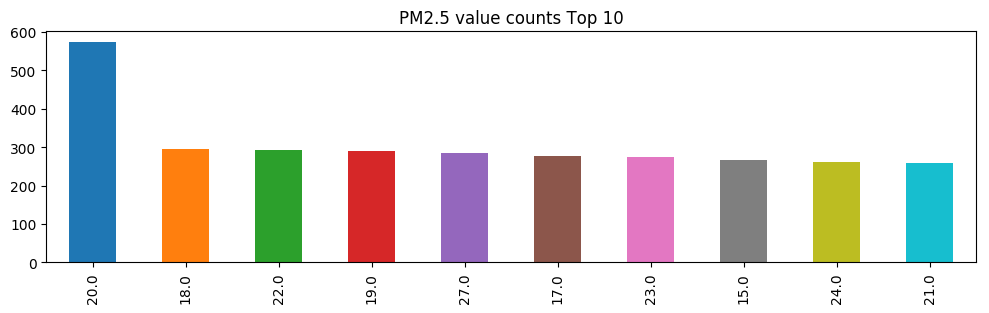

In [6]:
# 計算出 PM 2.5 出現數值最多次的前十名
top10_pm25_index = df.loc[:, 'PM2.5'].value_counts().index[:10]

# 計算出 PM 2.5 出現數值最多次的前十名，以及出現次數
top10_pm25 = df.loc[:, 'PM2.5'].value_counts().loc[top10_pm25_index]

# PM 2.5 出現數值最多次的前十名，以及出現次數畫成直方圖
top10_pm25.plot(kind='bar', title='PM2.5 value counts Top 10')

In [7]:
df_pm25_counts = pd.DataFrame(top10_pm25)

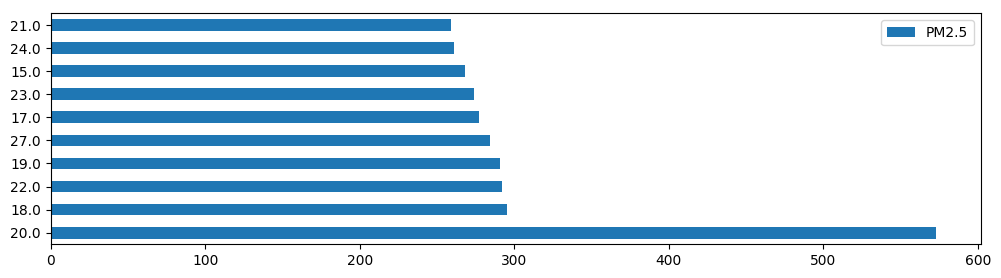

In [8]:
df_pm25_counts.plot.barh()

### `.plot(kind='line')`：折線圖

以下說明節錄自維基百科之「[趨勢圖](https://zh.wikipedia.org/zh-tw/趋势图)」條目：

> 趨勢圖（英文：run chart），也稱運行圖、鏈圖、走勢圖，是一類在時間序列中表達數據變量的統計圖表，通常該數據在一些工業或商業過程中可用來表達特定程序的表現。

參考文件：

* [Wikipedia | 趨勢圖](https://zh.wikipedia.org/zh-tw/趨勢圖)

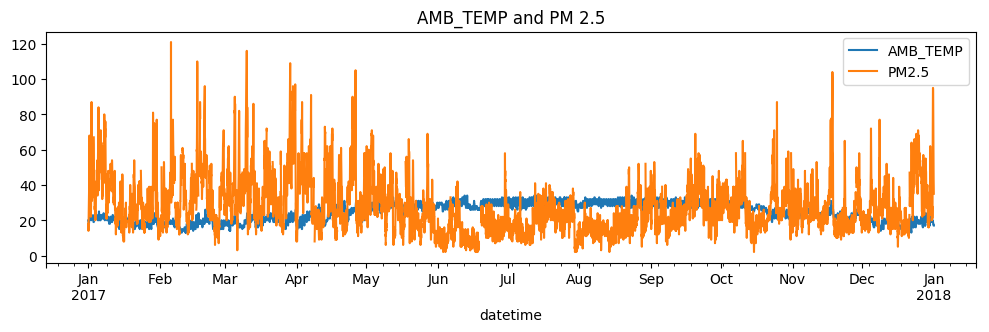

In [9]:
# 例：將大氣溫度和 PM 2.5 (Column label: 'AMB_TEMP', 'PM2.5') 畫成折線圖
# 並在標題顯示 'AMB_TEMP and PM 2.5
df[['AMB_TEMP', 'PM2.5']].plot(kind='line', title='AMB_TEMP and PM 2.5')

### `.plot(kind='box')`：箱形圖 (Box Plot)

以下說明節錄自維基百科「[箱形圖](https://zh.wikipedia.org/zh-tw/箱形圖)」條目：

> 又稱為盒鬚圖、盒式圖、盒狀圖或箱線圖，是一種用作顯示一組數據分散情況資料的統計圖。因型狀如箱子而得名。

參考文件：
* [Wikipedia | 箱形圖](https://zh.wikipedia.org/zh-tw/箱形圖)
* [箱型圖圖例說明](https://cht.qap.tw/example.htm)

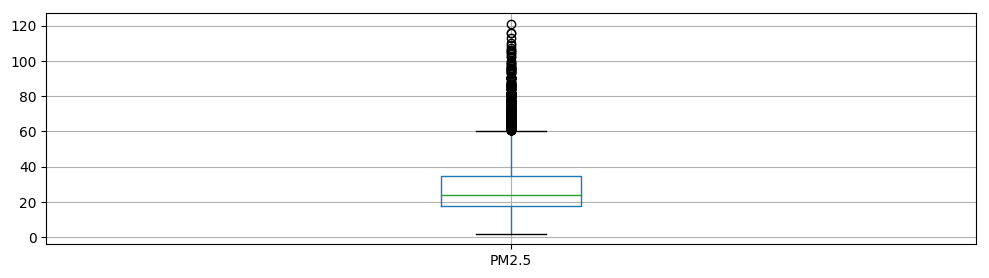

In [10]:
df[['PM2.5']].plot(kind='box', grid=True)

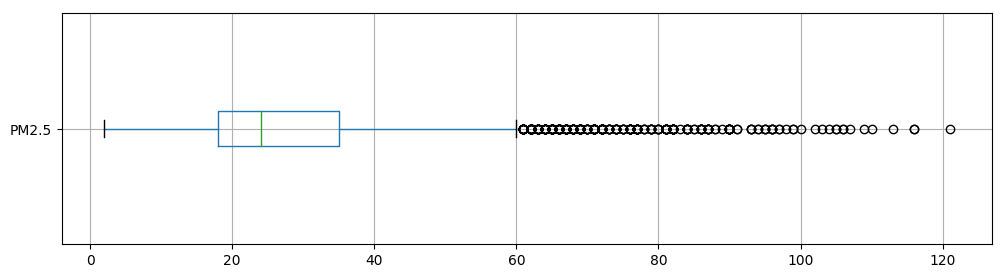

In [11]:
# 舉例說明：將 PM 2.5 畫成箱形圖，將圖形設為水平 (vert (= vertical) 為 False)
df[['PM2.5']].plot(kind='box', grid=True, vert=False)
# 與以下寫法等價
# df[['PM2.5']].boxplot(vert=False)